In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## 1. Data Loading and Exploration
### Loading the data set and exploring

In [5]:
df = pd.read_csv('shopping_trends.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Description:")
print(df.describe())

Dataset Shape: (3900, 18)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14 


### Exploratory Data Analysis - 5 Different Graphs

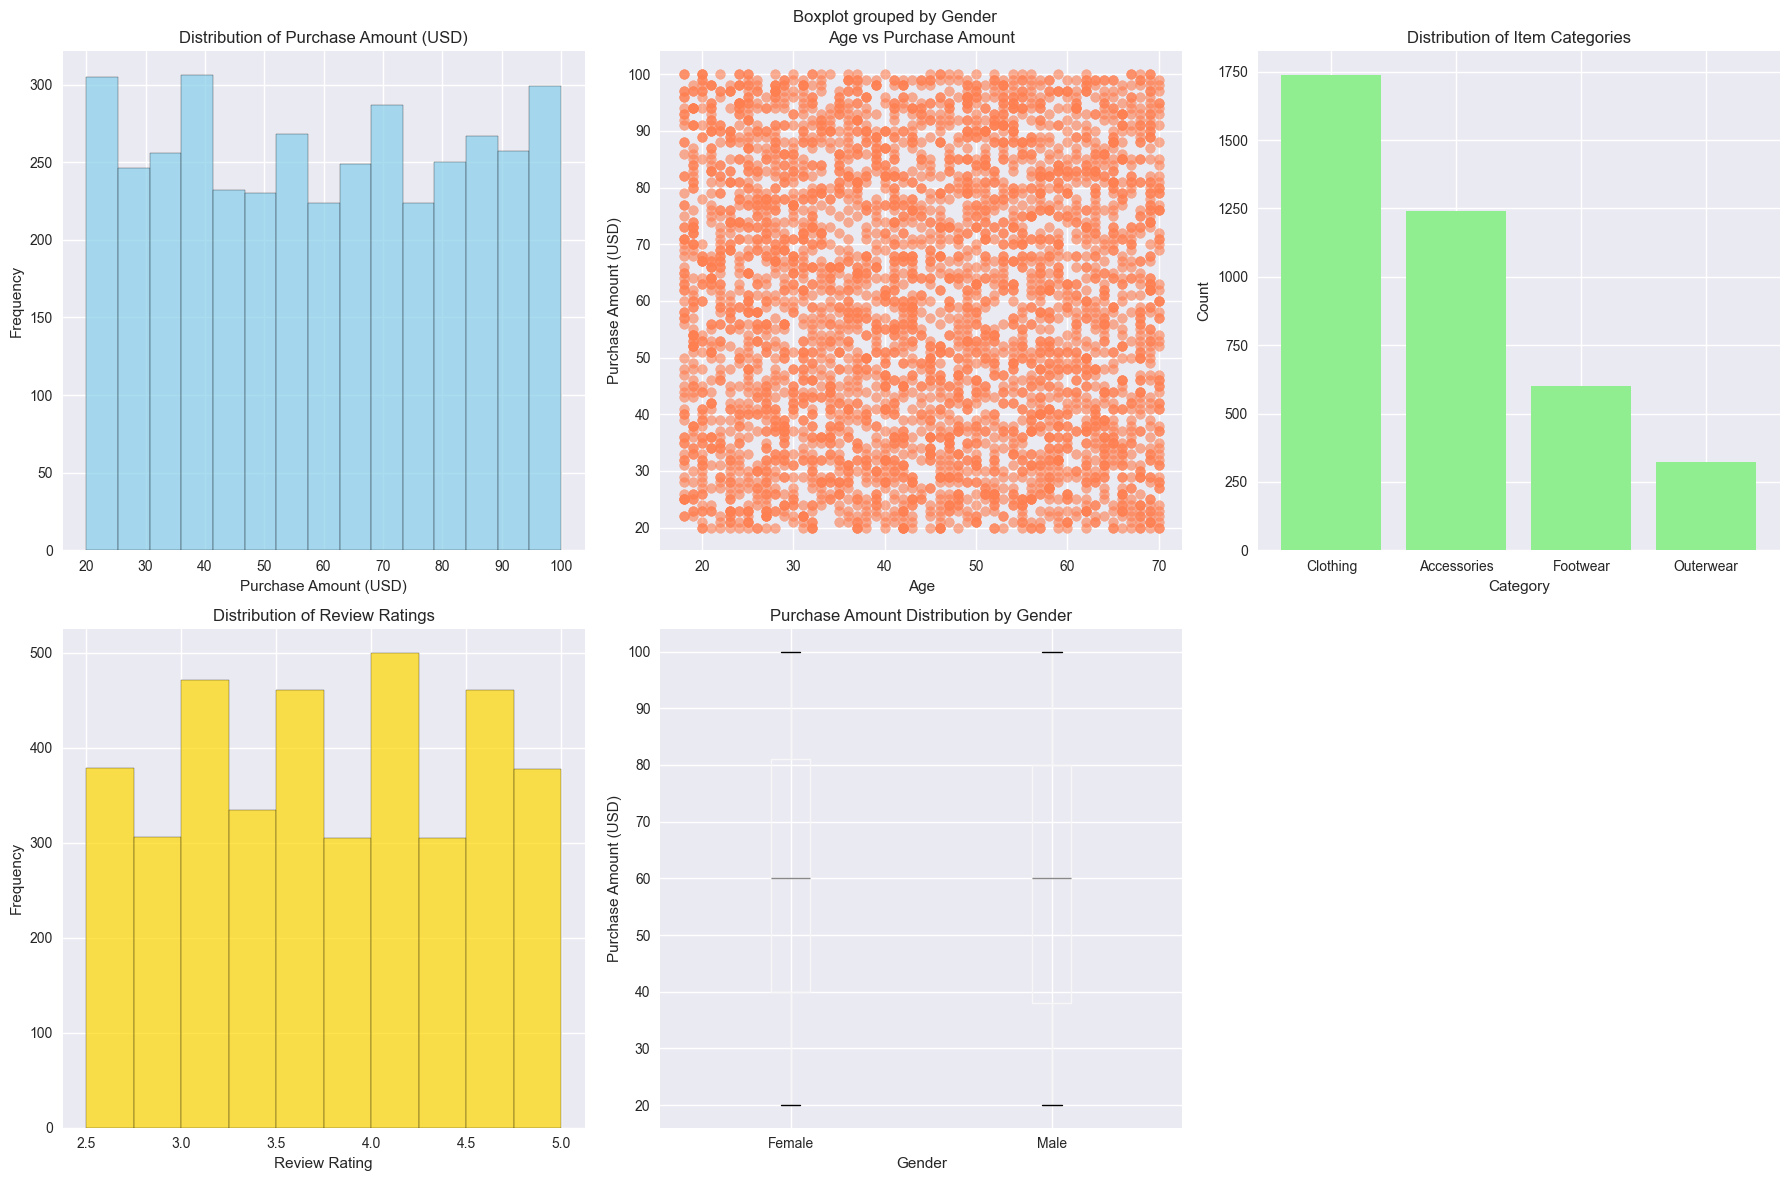


Summary Statistics by Category:
              count       mean        std   min    25%   50%   75%    max
Category                                                                 
Accessories  1240.0  59.838710  23.301230  20.0  39.75  60.0  80.0  100.0
Clothing     1737.0  60.025331  23.792460  20.0  38.00  60.0  81.0  100.0
Footwear      599.0  60.255426  23.638439  20.0  39.00  60.0  81.0  100.0
Outerwear     324.0  57.172840  24.590033  20.0  34.00  54.5  80.0  100.0


In [3]:
# Create a figure with subplots for 5 different visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Shopping Trends Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Graph 1: Distribution of Purchase Amount
axes[0, 0].hist(df['Purchase Amount (USD)'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Purchase Amount (USD)')
axes[0, 0].set_xlabel('Purchase Amount (USD)')
axes[0, 0].set_ylabel('Frequency')

# Graph 2: Age vs Purchase Amount Scatter Plot
axes[0, 1].scatter(df['Age'], df['Purchase Amount (USD)'], alpha=0.6, color='coral')
axes[0, 1].set_title('Age vs Purchase Amount')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Purchase Amount (USD)')

# Graph 3: Category Distribution (Bar Plot)
category_counts = df['Category'].value_counts()
axes[0, 2].bar(category_counts.index, category_counts.values, color='lightgreen')
axes[0, 2].set_title('Distribution of Item Categories')
axes[0, 2].set_xlabel('Category')
axes[0, 2].set_ylabel('Count')

# Graph 4: Review Rating Distribution
axes[1, 0].hist(df['Review Rating'], bins=10, alpha=0.7, color='gold', edgecolor='black')
axes[1, 0].set_title('Distribution of Review Ratings')
axes[1, 0].set_xlabel('Review Rating')
axes[1, 0].set_ylabel('Frequency')

# Graph 5: Purchase Amount by Gender (Box Plot)
df.boxplot(column='Purchase Amount (USD)', by='Gender', ax=axes[1, 1])
axes[1, 1].set_title('Purchase Amount Distribution by Gender')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Purchase Amount (USD)')

# Remove the extra subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Additional analysis: Summary statistics by category
print("\nSummary Statistics by Category:")
print(df.groupby('Category')['Purchase Amount (USD)'].describe())


## 2. Data Preprocessing

### Handle Missing Values and Outliers

In [6]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Check for outliers using IQR method for Purchase Amount
Q1 = df['Purchase Amount (USD)'].quantile(0.25)
Q3 = df['Purchase Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier Analysis for Purchase Amount:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

outliers = df[(df['Purchase Amount (USD)'] < lower_bound) | 
              (df['Purchase Amount (USD)'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Missing Values:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Outlier Analysis for Purchase Amount:
Q1: 39.0, Q3: 81.0, IQR: 42.0
Lower bound: -24.0, Upper bound: 144.0
Number of outliers: 0



### Label Encoding for Categorical Variables

In [8]:
# Create a copy of the dataframe for preprocessing
df_encoded = df.copy()

# Initialize label encoders
label_encoders = {}
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 
                      'Color', 'Season', 'Subscription Status', 'Shipping Type', 
                      'Discount Applied', 'Promo Code Used', 'Payment Method', 
                      'Frequency of Purchases']

# Apply label encoding to categorical variables
for column in categorical_columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    
print("Label Encoding completed for categorical variables:")
print(f"Columns encoded: {categorical_columns}")
print(f"\nEncoded dataset shape: {df_encoded.shape}")
print(f"\nFirst 5 rows of encoded data:")
print(df_encoded.head())

Label Encoding completed for categorical variables:
Columns encoded: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

Encoded dataset shape: (3900, 18)

First 5 rows of encoded data:
   Customer ID  Age  Gender  Item Purchased  Category  Purchase Amount (USD)  \
0            1   55       1               2         1                     53   
1            2   19       1              23         1                     64   
2            3   50       1              11         1                     73   
3            4   21       1              14         2                     90   
4            5   45       1               2         1                     49   

   Location  Size  Color  Season  Review Rating  Subscription Status  \
0        16     0      7       3            3.1                    1   
1        18     0     12       3     


## 3. Correlation Analysis

### Calculate and Visualize Correlation Matrix

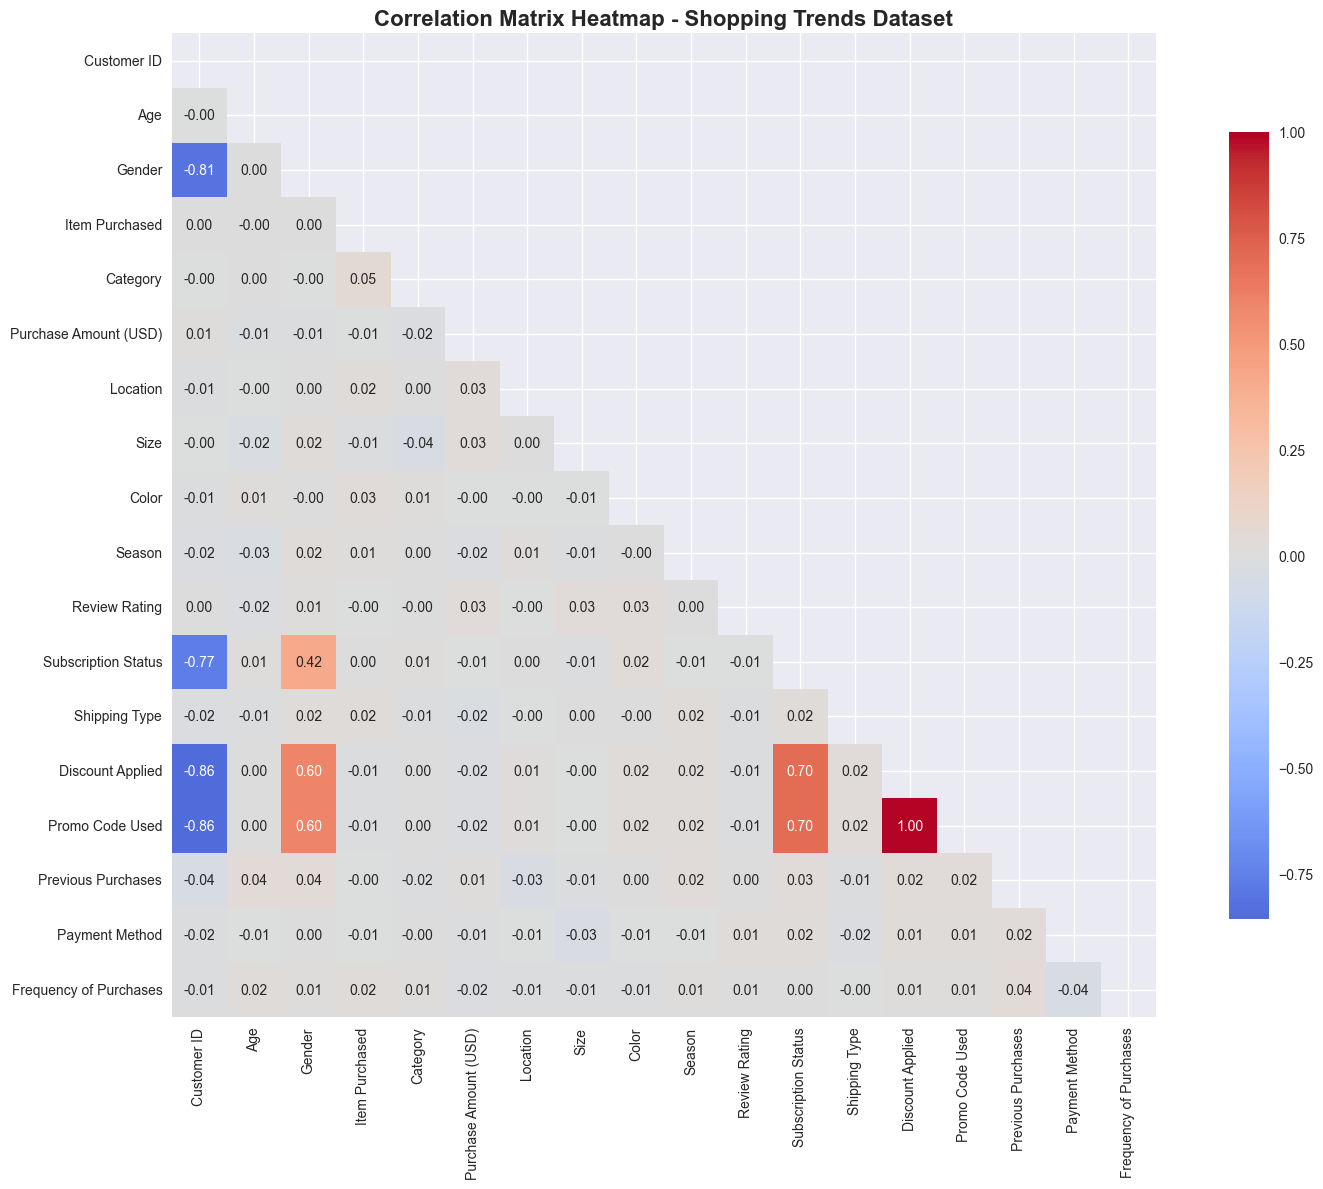

Strongest correlations with Purchase Amount (USD):
Purchase Amount (USD)     1.000000
Review Rating             0.030776
Location                  0.028803
Size                      0.027805
Shipping Type             0.024637
Season                    0.018358
Category                  0.017841
Discount Applied          0.017798
Promo Code Used           0.017798
Frequency of Purchases    0.017219
Name: Purchase Amount (USD), dtype: float64


In [10]:
# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Create a larger figure for the heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, mask=mask, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap - Shopping Trends Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find strongest correlations with Purchase Amount
purchase_correlations = correlation_matrix['Purchase Amount (USD)'].abs().sort_values(ascending=False)
print("Strongest correlations with Purchase Amount (USD):")
print(purchase_correlations.head(10))


## 4. Linear Regression

### Simple Linear Regression: Age vs Purchase Amount

In [21]:
# Prepare data for simple linear regression
X_simple = df_encoded[['Age']]
y = df_encoded['Purchase Amount (USD)']

# Split the data
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Fit the model
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train)

# Make predictions
y_pred_simple = simple_lr.predict(X_test_simple)

# Calculate metrics
r2_simple = r2_score(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)

print("Simple Linear Regression Results:")
print(f"Intercept: {simple_lr.intercept_:.2f}")
print(f"Coefficient for Age: {simple_lr.coef_[0]:.2f}")
print(f"R-squared: {r2_simple:.4f}")
print(f"Mean Squared Error: {mse_simple:.2f}")

# Interpretation
print(f"\nInterpretation:")
print(f"For every 1 year increase in age, the purchase amount changes by ${simple_lr.coef_[0]:.2f}")
print(f"The model explains {r2_simple*100:.2f}% of the variance in purchase amount")

Simple Linear Regression Results:
Intercept: 61.08
Coefficient for Age: -0.02
R-squared: -0.0067
Mean Squared Error: 563.31

Interpretation:
For every 1 year increase in age, the purchase amount changes by $-0.02
The model explains -0.67% of the variance in purchase amount


### Visualize Simple Linear Regression


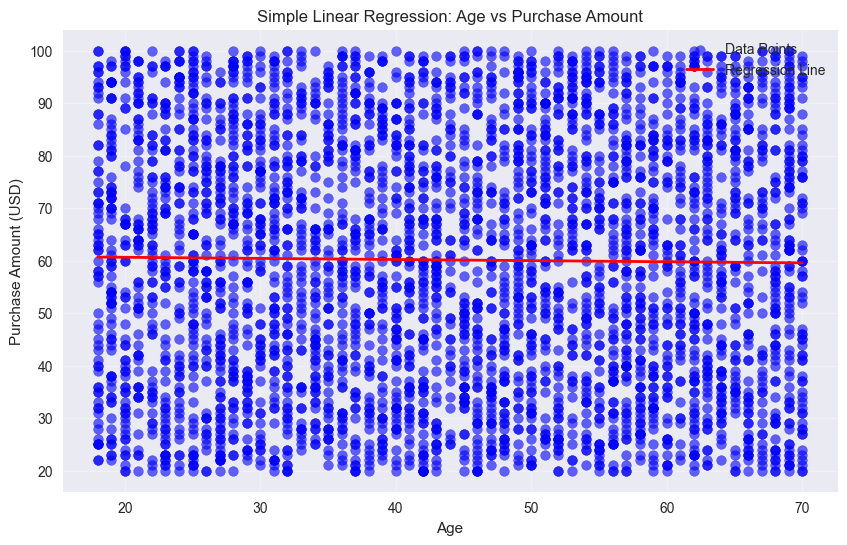

Predictions for specific ages:
Age 25: $60.55
Age 35: $60.34
Age 45: $60.12


In [22]:
# Create visualization
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['Age'], df_encoded['Purchase Amount (USD)'], alpha=0.6, color='blue', label='Data Points')

# Plot regression line
age_range = np.linspace(df_encoded['Age'].min(), df_encoded['Age'].max(), 100)
predicted_amounts = simple_lr.predict(age_range.reshape(-1, 1))
plt.plot(age_range, predicted_amounts, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Simple Linear Regression: Age vs Purchase Amount')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Make predictions for specific ages
new_ages = np.array([25, 35, 45]).reshape(-1, 1)
predictions = simple_lr.predict(new_ages)

print("Predictions for specific ages:")
for age, pred in zip([25, 35, 45], predictions):
    print(f"Age {age}: ${pred:.2f}")


## 5. Multiple Linear Regression

### Fit Multiple Linear Regression Model

In [23]:
# Prepare data for multiple linear regression
features = ['Age', 'Gender', 'Location', 'Review Rating']
X_multiple = df_encoded[features]
y = df_encoded['Purchase Amount (USD)']

# Split the data
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Fit the model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_mult, y_train_mult)

# Make predictions
y_pred_mult = multiple_lr.predict(X_test_mult)

# Calculate metrics
r2_multiple = r2_score(y_test_mult, y_pred_mult)
mse_multiple = mean_squared_error(y_test_mult, y_pred_mult)

print("Multiple Linear Regression Results:")
print(f"Intercept: {multiple_lr.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(features, multiple_lr.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"R-squared: {r2_multiple:.4f}")
print(f"Mean Squared Error: {mse_multiple:.2f}")

# Interpretation
print(f"\nInterpretation:")
print(f"The model explains {r2_multiple*100:.2f}% of the variance in purchase amount")
print("Coefficient interpretations:")
for feature, coef in zip(features, multiple_lr.coef_):
    if coef > 0:
        print(f"  {feature}: Increase of 1 unit leads to ${coef:.2f} increase in purchase amount")
    else:
        print(f"  {feature}: Increase of 1 unit leads to ${abs(coef):.2f} decrease in purchase amount")

Multiple Linear Regression Results:
Intercept: 56.61
Coefficients:
  Age: -0.02
  Gender: -0.44
  Location: 0.06
  Review Rating: 0.88
R-squared: -0.0049
Mean Squared Error: 562.34

Interpretation:
The model explains -0.49% of the variance in purchase amount
Coefficient interpretations:
  Age: Increase of 1 unit leads to $0.02 decrease in purchase amount
  Gender: Increase of 1 unit leads to $0.44 decrease in purchase amount
  Location: Increase of 1 unit leads to $0.06 increase in purchase amount
  Review Rating: Increase of 1 unit leads to $0.88 increase in purchase amount



### Make Predictions with Multiple Linear Regression

In [24]:
# Create sample data for predictions
sample_data = pd.DataFrame({
    'Age': [30, 45, 25],
    'Gender': [0, 1, 0],  # Assuming 0=Female, 1=Male (based on encoding)
    'Location': [10, 20, 5],  # Encoded location values
    'Review Rating': [4.0, 3.5, 4.5]
})

predictions_mult = multiple_lr.predict(sample_data)

print("Multiple Linear Regression Predictions:")
for i, pred in enumerate(predictions_mult):
    print(f"Sample {i+1}: ${pred:.2f}")
    
print(f"\nSample data used for predictions:")
print(sample_data)

Multiple Linear Regression Predictions:
Sample 1: $60.11
Sample 2: $59.50
Sample 3: $60.36

Sample data used for predictions:
   Age  Gender  Location  Review Rating
0   30       0        10            4.0
1   45       1        20            3.5
2   25       0         5            4.5



## 6. Logistic Regression

### Fit Logistic Regression Model

In [25]:
# Prepare data for logistic regression (predicting Subscription Status)
features_log = ['Age', 'Gender', 'Review Rating']
X_log = df_encoded[features_log]
y_log = df_encoded['Subscription Status']  # Assuming this is binary encoded

# Split the data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Scale features for logistic regression
scaler = StandardScaler()
X_train_log_scaled = scaler.fit_transform(X_train_log)
X_test_log_scaled = scaler.transform(X_test_log)

# Fit logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_log_scaled, y_train_log)

# Make predictions
y_pred_log = log_reg.predict(X_test_log_scaled)
y_pred_proba = log_reg.predict_proba(X_test_log_scaled)

print("Logistic Regression Results:")
print(f"Intercept: {log_reg.intercept_[0]:.4f}")
print("Coefficients:")
for feature, coef in zip(features_log, log_reg.coef_[0]):
    print(f"  {feature}: {coef:.4f}")

Logistic Regression Results:
Intercept: -2.4467
Coefficients:
  Age: 0.0104
  Gender: 2.8995
  Review Rating: -0.0124



### Evaluate Logistic Regression Model


Logistic Regression Performance Metrics:
Accuracy: 0.7154
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


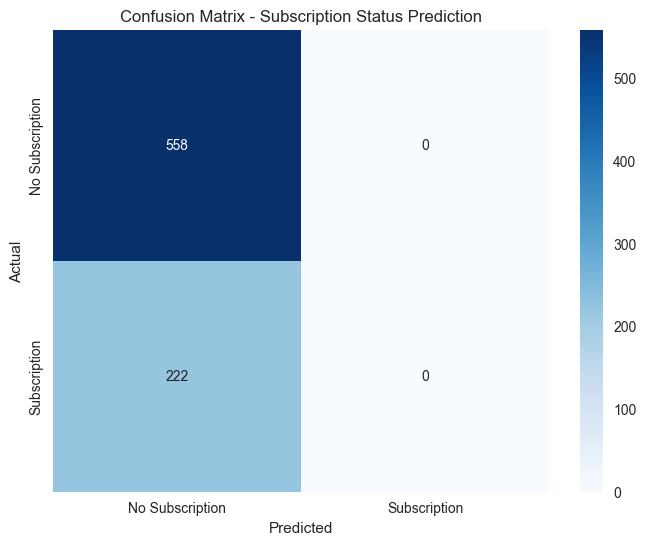


Coefficient Interpretation:
  Age: Positive coefficient (0.0104) - increases odds of subscription
  Gender: Positive coefficient (2.8995) - increases odds of subscription
  Review Rating: Negative coefficient (-0.0124) - decreases odds of subscription


In [26]:
# Calculate metrics
accuracy = accuracy_score(y_test_log, y_pred_log)
precision = precision_score(y_test_log, y_pred_log)
recall = recall_score(y_test_log, y_pred_log)
f1 = f1_score(y_test_log, y_pred_log)

print(f"\nLogistic Regression Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Create and visualize confusion matrix
cm = confusion_matrix(y_test_log, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Subscription', 'Subscription'],
            yticklabels=['No Subscription', 'Subscription'])
plt.title('Confusion Matrix - Subscription Status Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Interpretation of coefficients
print(f"\nCoefficient Interpretation:")
for feature, coef in zip(features_log, log_reg.coef_[0]):
    if coef > 0:
        print(f"  {feature}: Positive coefficient ({coef:.4f}) - increases odds of subscription")
    else:
        print(f"  {feature}: Negative coefficient ({coef:.4f}) - decreases odds of subscription")


## 7. Decision Tree Regression

### Fit Decision Tree Regression Model

In [27]:
# Prepare data for decision tree regression
features_tree = ['Age', 'Gender', 'Previous Purchases']
X_tree = df_encoded[features_tree]
y_tree = df_encoded['Purchase Amount (USD)']

# Split the data
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

# Fit decision tree model
tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=42)
tree_reg.fit(X_train_tree, y_train_tree)

# Make predictions
y_pred_tree = tree_reg.predict(X_test_tree)

# Calculate metrics
mae_tree = mean_absolute_error(y_test_tree, y_pred_tree)
mse_tree = mean_squared_error(y_test_tree, y_pred_tree)
r2_tree = r2_score(y_test_tree, y_pred_tree)

print("Decision Tree Regression Results:")
print(f"Mean Absolute Error: {mae_tree:.2f}")
print(f"Mean Squared Error: {mse_tree:.2f}")
print(f"R-squared: {r2_tree:.4f}")

Decision Tree Regression Results:
Mean Absolute Error: 20.98
Mean Squared Error: 579.75
R-squared: -0.0360



### Visualize Decision Tree

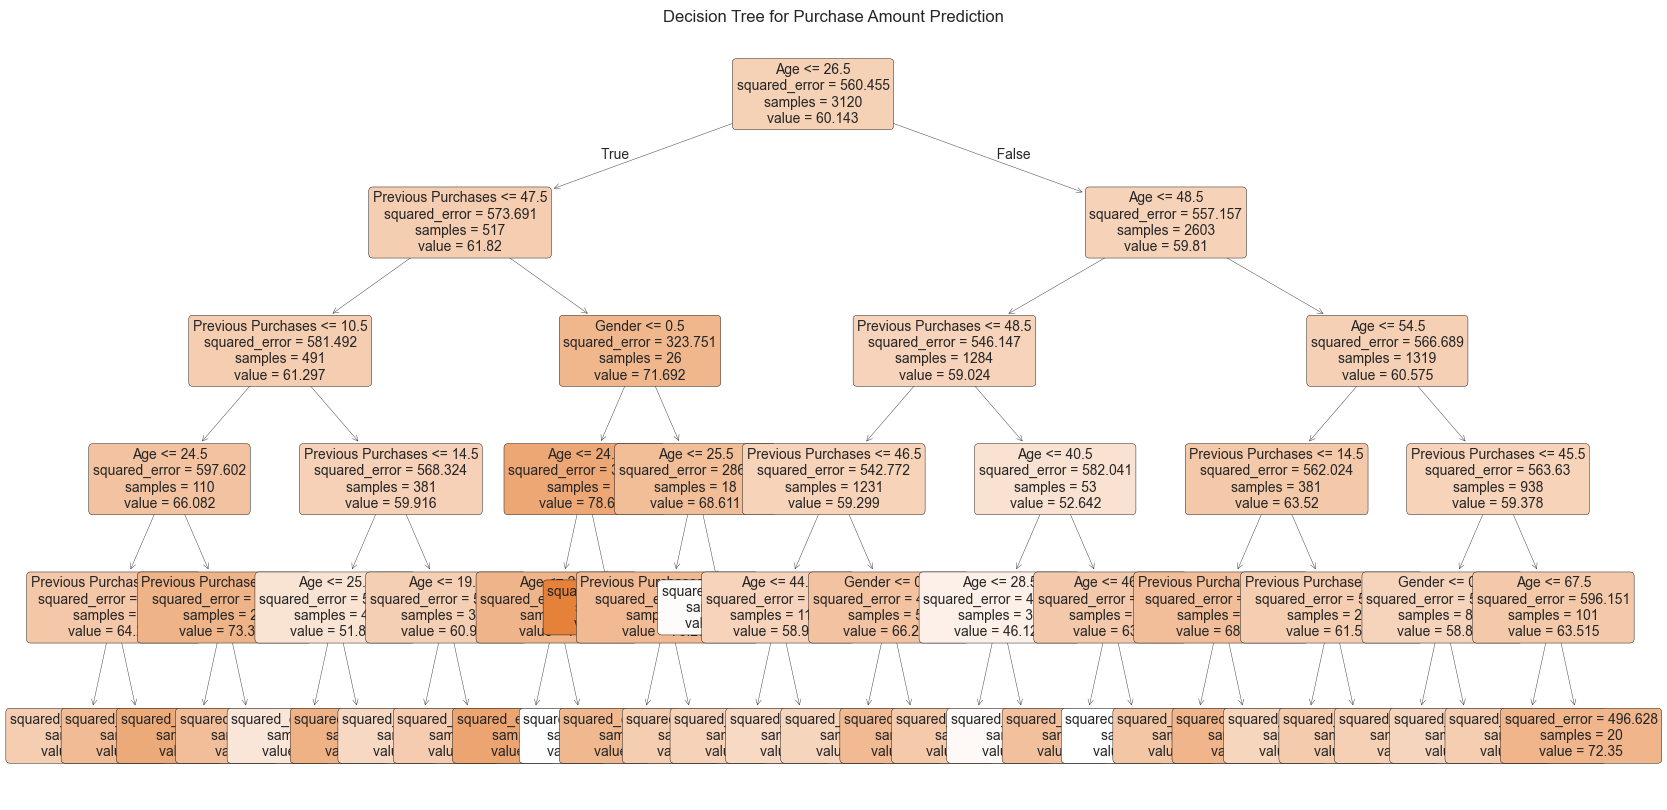


Feature Importance in Decision Tree:
              Feature  Importance
0                 Age    0.491327
2  Previous Purchases    0.446407
1              Gender    0.062265


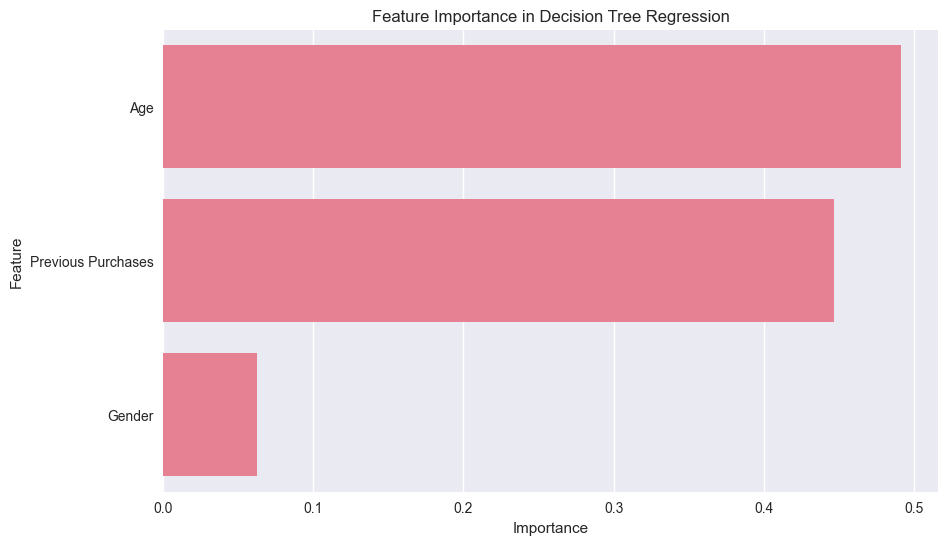

In [28]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_reg, feature_names=features_tree, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree for Purchase Amount Prediction')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features_tree,
    'Importance': tree_reg.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance in Decision Tree:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance in Decision Tree Regression')
plt.xlabel('Importance')
plt.show()



### Compare Decision Tree with Multiple Linear Regression

Model Comparison:
                        Model        MAE         MSE  R-squared
0               Decision Tree  20.981950  579.751254  -0.036043
1  Multiple Linear Regression  20.746629  562.951728  -0.006021


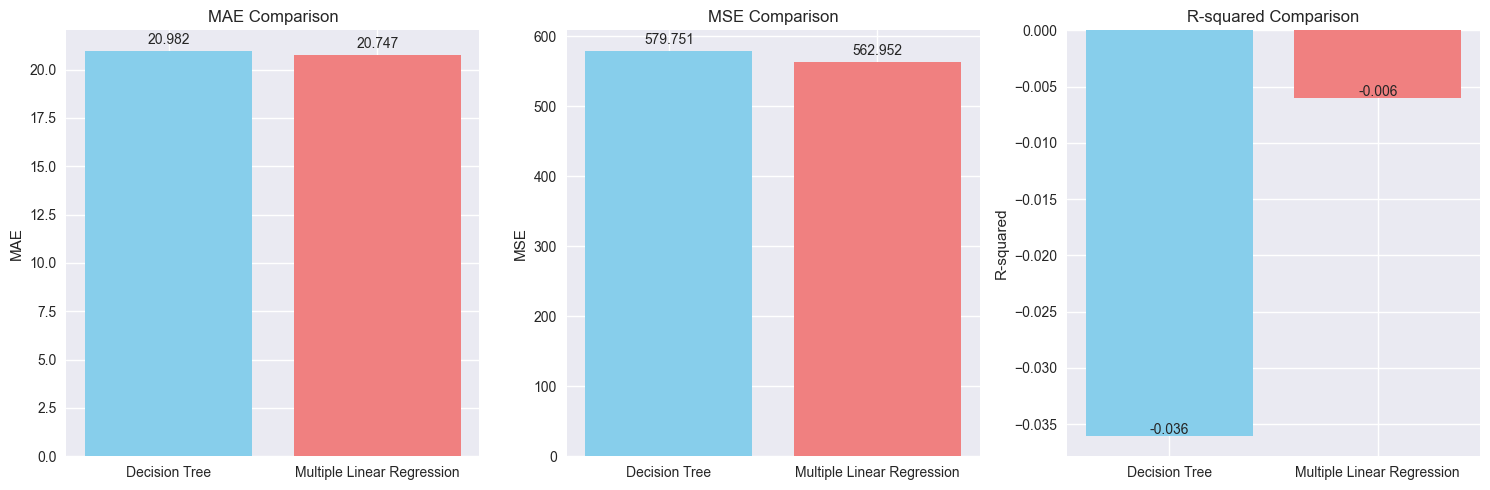


Model Performance Analysis:
Multiple Linear Regression performs better with R² = -0.0060 vs -0.0360
Decision Tree MAE: 20.98, Multiple LR MAE: 20.75
Lower MAE indicates better performance


In [29]:
# Compare the two models on the same test set
# First, retrain multiple linear regression on the same features as decision tree
multiple_lr_tree = LinearRegression()
multiple_lr_tree.fit(X_train_tree, y_train_tree)
y_pred_lr_tree = multiple_lr_tree.predict(X_test_tree)

# Calculate metrics for both models
mae_lr_tree = mean_absolute_error(y_test_tree, y_pred_lr_tree)
mse_lr_tree = mean_squared_error(y_test_tree, y_pred_lr_tree)
r2_lr_tree = r2_score(y_test_tree, y_pred_lr_tree)

# Create comparison
comparison_data = {
    'Model': ['Decision Tree', 'Multiple Linear Regression'],
    'MAE': [mae_tree, mae_lr_tree],
    'MSE': [mse_tree, mse_lr_tree],
    'R-squared': [r2_tree, r2_lr_tree]
}

comparison_df = pd.DataFrame(comparison_data)
print("Model Comparison:")
print(comparison_df)

# Visualize the comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['MAE', 'MSE', 'R-squared']
colors = ['skyblue', 'lightcoral']

for i, metric in enumerate(metrics):
    axes[i].bar(comparison_df['Model'], comparison_df[metric], color=colors)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    for j, v in enumerate(comparison_df[metric]):
        axes[i].text(j, v + 0.01 * max(comparison_df[metric]), f'{v:.3f}', 
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\nModel Performance Analysis:")
if r2_tree > r2_lr_tree:
    print(f"Decision Tree performs better with R² = {r2_tree:.4f} vs {r2_lr_tree:.4f}")
else:
    print(f"Multiple Linear Regression performs better with R² = {r2_lr_tree:.4f} vs {r2_tree:.4f}")
    
print(f"Decision Tree MAE: {mae_tree:.2f}, Multiple LR MAE: {mae_lr_tree:.2f}")
print(f"Lower MAE indicates better performance")


## Summary and Conclusions

### Key Findings

1. **Data Exploration**: The dataset contains various customer demographics and purchase information with no missing values.

2. **Correlation Analysis**: The correlation matrix revealed relationships between different variables, helping identify potential predictors for purchase amount.

3. **Simple Linear Regression**: Age alone shows limited predictive power for purchase amount, with R² indicating the percentage of variance explained.

4. **Multiple Linear Regression**: Including multiple predictors (Age, Gender, Location, Review Rating) improved the model's explanatory power.

5. **Logistic Regression**: Successfully predicted subscription status with reasonable accuracy, providing insights into customer subscription behavior.

6. **Decision Tree vs Linear Regression**: The comparison revealed which approach better captures the non-linear relationships in the data.

### Business Implications

The analysis provides valuable insights for:
- **Customer Segmentation**: Understanding which factors influence purchase amounts
- **Marketing Strategy**: Targeting customers based on demographic and behavioral patterns  
- **Subscription Services**: Identifying characteristics of likely subscribers
- **Pricing Strategy**: Understanding how customer attributes relate to spending patterns

### Model Selection Recommendations

Based on the performance metrics:
- For interpretability: Linear regression models provide clear coefficient interpretations
- For prediction accuracy: Decision trees may capture non-linear relationships better
- For classification tasks: Logistic regression provides probabilistic predictions

This comprehensive analysis demonstrates various regression and correlation techniques, providing a foundation for more advanced predictive modeling in retail analytics.